## Exploratory Data Analysis - Team 86

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
# load the csv into a pandas dataframe
df = pd.read_csv('data_clean.csv',parse_dates=['FECHA_DESPACHO'])

In [3]:
# select and rename useful columns
df = df[['TERMINAL', 'DESPACHOS', 'CLASE_VEHICULO', 'TIPO_DESPACHO', 'FECHA_DESPACHO', 'HORA_DESPACHO', 'PASAJEROS_CLEAN',
          'MUNICIPIO_ORIGEN', 'DEPARTAMENTO_ORIGEN',
          'MUNICIPIO_DESTINO', 'DEPARTAMENTO_DESTINO',
          'NIVEL_SERVICIO']]
df = df.rename(columns={'PASAJEROS_CLEAN':'PASAJEROS'})

df['DIA'] = df['FECHA_DESPACHO'].dt.weekday
df['DIA'] = df['DIA'].map({0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'})
df['DIA'] = pd.Categorical(df['DIA'], 
                           categories = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sabado', 'Domingo'],
                           ordered=True)

df.head()

,TERMINAL,DESPACHOS,CLASE_VEHICULO,TIPO_DESPACHO,FECHA_DESPACHO,HORA_DESPACHO,PASAJEROS,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,NIVEL_SERVICIO,DIA
0,T.T. DE BOGOTÁ NORTE,2,MICROBUS,TRANSITO,2021-03-01,8,0,Bogotá D.C.,Bogotá D.C.,Sogamoso,Boyacá,LUJO,Lunes
1,T.T. DE BOGOTÁ SALITRE,4,BUS,ORIGEN,2021-03-12,11,45,Bogotá D.C.,Bogotá D.C.,Cali,Valle del Cauca,LUJO,Viernes
2,T.T. DE CALI,1,BUSETA,ORIGEN,2021-01-09,6,3,Cali,Valle del Cauca,La Cruz,Nariño,BASICO,Sabado
3,T.T. DE MELGAR,1,MICROBUS,ORIGEN,2021-02-28,12,1,Melgar,Tolima,Nilo,Cundinamarca,BASICO,Domingo
4,T.T. DE MANIZALES,1,MICROBUS,ORIGEN,2021-01-28,20,13,Manizales,Caldas,Chinchiná,Caldas,LUJO,Jueves


In [4]:
# verify type of features
df.dtypes

TERMINAL                        object
DESPACHOS                        int64
CLASE_VEHICULO                  object
TIPO_DESPACHO                   object
FECHA_DESPACHO          datetime64[ns]
HORA_DESPACHO                    int64
PASAJEROS                        int64
MUNICIPIO_ORIGEN                object
DEPARTAMENTO_ORIGEN             object
MUNICIPIO_DESTINO               object
DEPARTAMENTO_DESTINO            object
NIVEL_SERVICIO                  object
DIA                           category
dtype: object

In [5]:
# description of statistics of number features
df.describe()

,DESPACHOS,HORA_DESPACHO,PASAJEROS
count,9.014600e+06,9.014600e+06,9.014600e+06
mean,1.967956e+00,1.201775e+01,1.379984e+01
std,2.291456e+00,5.020562e+00,2.183463e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.000000e+00,3.000000e+00
50%,1.000000e+00,1.200000e+01,8.000000e+00
75%,2.000000e+00,1.600000e+01,1.600000e+01
max,1.400000e+02,2.300000e+01,2.200000e+03


## Review of data behavior

The data show a drop in the volume of passengers using the transportation service since the beginning of COVID-19 confinement.

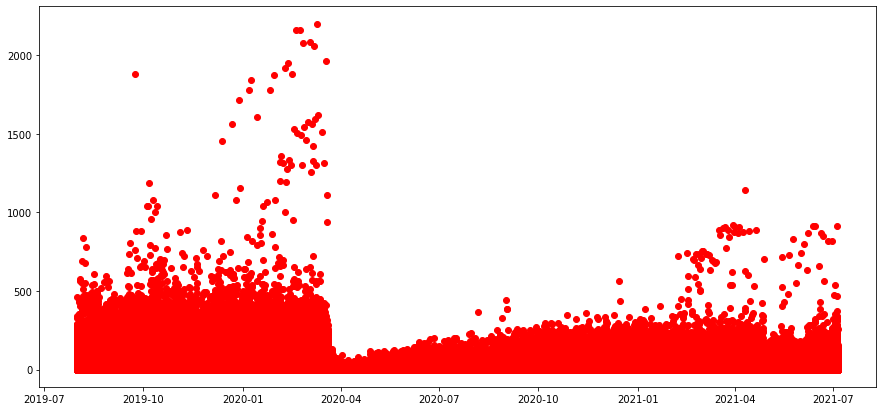

In [6]:
df_fech= df[df['FECHA_DESPACHO']<'2052-12-28']['FECHA_DESPACHO']
df_pasa = df[df['FECHA_DESPACHO']<'2052-12-28']['PASAJEROS']
plt.figure(figsize = (15,7))
plt.plot(df_fech, df_pasa, 'ro', linestyle="None")

## Dataset description

### Meaning of Each Entry

Each entry/row in the dataset gives information about the number and type of Dispatches that Vehicles (of a given type and service level) registered, also about the number of passengers for the same dispatch quantity, in a given date, hour, terminal and route (Origin and Destination municipality).

**Example:** For the first entry (index = 0).
- **2** - **Microbus** - **Luxury level** - **On Transit** dispatches, on **2021-03-01** at **8 hours (between  8:00 and 8:59)**, with **0 passengers (distributed on both dispatches)** from **T.T. de Bogotá Norte** - **Bogotá D.C.** to **Sogamoso - Boyacá**

Given the above description, basic EDA can be performed for each individual variable and a global of them for a better understanding of the ground-regional transport operation in Colombia.
Regarding the Terminals distribution and the registration frequency for each of them, the following bar plot is displayed. This gives an overview of how important the Terminals are.

In [7]:
df2 = df.groupby(['TERMINAL','TIPO_DESPACHO']).sum().unstack('TIPO_DESPACHO').fillna(0)
df2

DESPACHOS           HORA_DESPACHO             \
TIPO_DESPACHO              ORIGEN  TRANSITO        ORIGEN   TRANSITO   
TERMINAL                                                               
T.T. DE AGUACHICA         41458.0   46508.0      396397.0   545426.0   
T.T. DE AGUAZUL           23464.0  155222.0      154915.0  1246799.0   
T.T. DE APARTADÓ         444100.0       0.0     1115941.0        0.0   
T.T. DE ARMENIA          930320.0   90573.0     3719327.0   857811.0   
T.T. DE BARRANQUILLA     251841.0   40285.0     1417473.0   433581.0   
T.T. DE BOGOTÁ NORTE     254967.0  312885.0     1246291.0  2381900.0   
T.T. DE BOGOTÁ SALITRE  1636583.0       0.0     9729757.0        0.0   
T.T. DE BOGOTÁ SUR        32097.0  355570.0      322489.0  2640524.0   
T.T. DE BUCARAMANGA      282680.0   25506.0     2335196.0   274702.0   
T.T. DE BUENAVENTURA      50483.0       0.0      260146.0        0.0   
T.T. DE BUGA             261342.0   67571.0     1247857.0   727175.0   
T.T. DE CALI            1526398.0   14827.0     6352140.0   189807.0   
T.T. DE CARTAGENA        483750.0    7123.0     1916772.0    97759.0   
T.T. DE CAUCASIA          50059.0   47665.0      391145.0   530762.0   
T.T. DE CHIQUINQUIRÁ     218157.0   44341.0     1003670.0   411894.0   
T.T. DE CÚCUTA           195864.0       0.0     1578084.0        0.0   
T.T. DE DUITAMA          325628.0  101674.0     1178517.0   690411.0   
T.T. DE ESPINAL           80984.0  234595.0      584534.0  2246570.0   
T.T. DE FLORENCIA        214403.0    3455.0     1623740.0    27013.0   
T.T. DE FUSAGASUGA       253059.0  104351.0      654723.0   991654.0   
T.T. DE GARZÓN            48688.0  158598.0      481958.0  1388447.0   
T.T. DE GIRARDOT         187985.0   41339.0      739489.0   297363.0   
T.T. DE HONDA             75355.0  231670.0      493901.0  2297875.0   
T.T. DE IBAGUÉ           314172.0   94436.0     2618054.0   856276.0   
T.T. DE IPIALES          238720.0    2547.0     1402486.0    18997.0   
T.T. DE LA PLATA          46312.0    7120.0      442064.0    78670.0   
T.T. DE MAICAO            37635.0       0.0      261551.0        0.0   
T.T. DE MANIZALES        343991.0    6585.0     2363695.0    70058.0   
T.T. DE MEDELLÍN NORTE  1011202.0       0.0     6798236.0        0.0   
T.T. DE MEDELLÍN SUR     345789.0       0.0     3127290.0        0.0   
T.T. DE MELGAR            75103.0  157741.0      525387.0  1530839.0   
T.T. DE MONTERÍA         318578.0    9436.0     2012021.0    91367.0   
T.T. DE NEIVA            312768.0   60947.0     2814662.0   533229.0   
T.T. DE OCAÑA             55253.0    1985.0      440692.0    21745.0   
T.T. DE PAMPLONA          30460.0   11121.0      245327.0   108709.0   
T.T. DE PASTO            329627.0   51385.0     2309920.0   416093.0   
T.T. DE PEREIRA          797245.0  143096.0     3156238.0   952625.0   
T.T. DE PITALITO         265573.0   35723.0     1725613.0   389501.0   
T.T. DE POPAYÁN          314381.0   83930.0     1946730.0   764682.0   
T.T. DE QUIBDO            17885.0       0.0      136879.0        0.0   
T.T. DE SAN GIL           53491.0       0.0      368019.0        0.0   
T.T. DE SANTA MARTA      225483.0   45502.0      783199.0   225177.0   
T.T. DE SOCORRO           34408.0       0.0      221346.0        0.0   
T.T. DE SOGAMOSO         318277.0   19474.0     1478578.0   210547.0   
T.T. DE TULÚA            237505.0  228798.0     1197908.0  1503573.0   
T.T. DE TUNJA            234032.0   97266.0     1397017.0   755622.0   
T.T. DE VALLEDUPAR       183762.0    8209.0     1266067.0    93864.0   
T.T. DE VILLAGARZÓN      129742.0   33358.0      774426.0   379588.0   
T.T. DE VILLAVICENCIO    376169.0   40687.0     1865729.0   433003.0   

                         PASAJEROS             
TIPO_DESPACHO               ORIGEN   TRANSITO  
TERMINAL                                       
T.T. DE AGUACHICA         142067.0   239450.0  
T.T. DE AGUAZUL           178949.0   453252.0  
T.T. DE APARTADÓ         2010013.0     

We can note that the behavior of dispatches has a higher concentration of passengers in origin terminals than in transit terminals. Therefore, the number of passengers using the service at each terminal is the characteristic of interest regardless of the type of dispatch.

<AxesSubplot:xlabel='TERMINAL'>

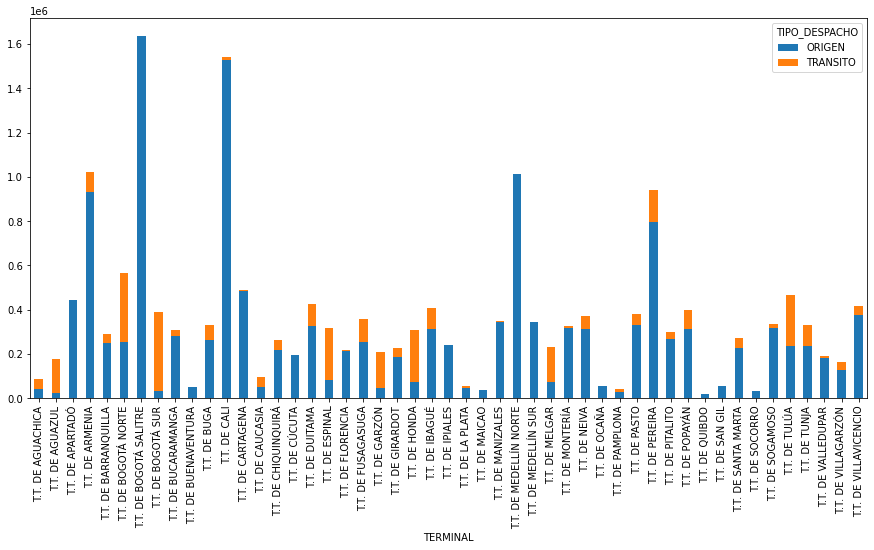

In [8]:
df2['DESPACHOS'].plot(kind='bar', stacked = True, figsize = (15,7))

Therefore, terminals with more dispatches does not mean that they are the ones with the greatest number of passengers since this depends on the type of vehicle and capacity of each one, so it is the number of passengers that can determine the number of dispatches.

<AxesSubplot:>

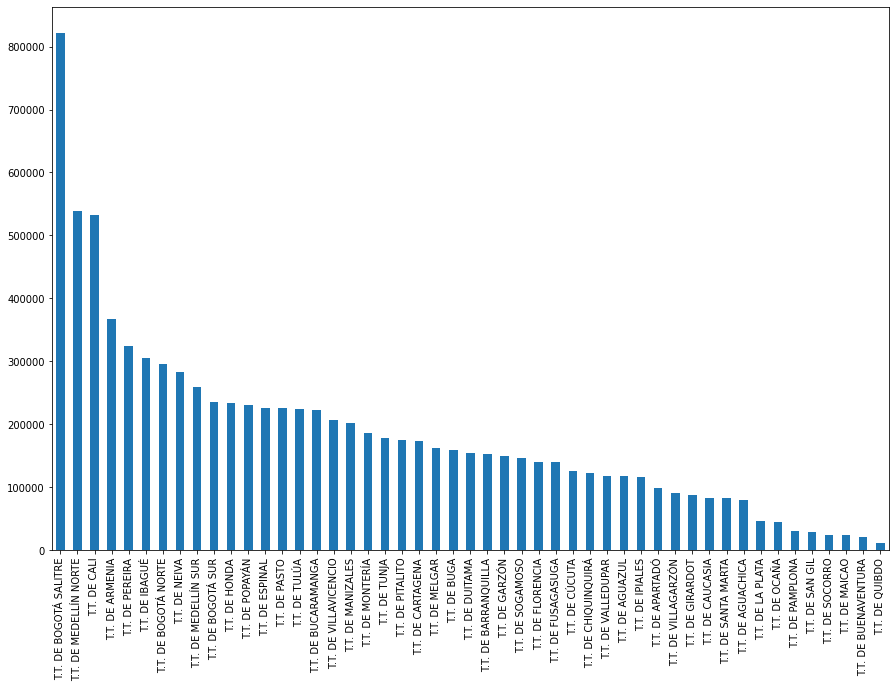

In [9]:
# number of dispatches per terminal
plt.figure(figsize=(15,10))
df.TERMINAL.value_counts().plot.bar()

<AxesSubplot:xlabel='TERMINAL'>

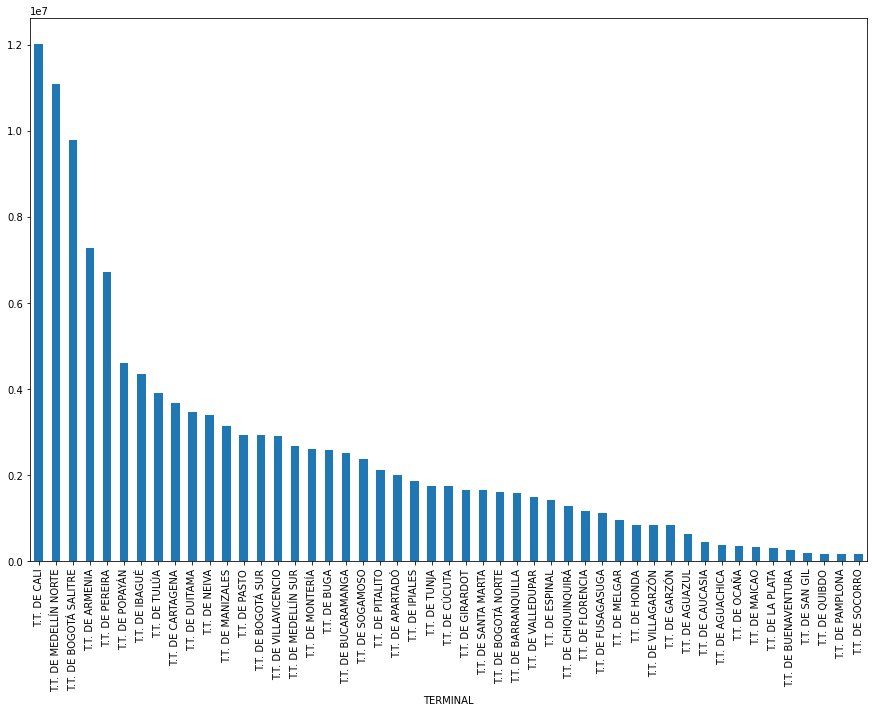

In [10]:
# number of passengers per terminal
plt.figure(figsize=(15,10))
df.groupby('TERMINAL').sum()['PASAJEROS'].sort_values(ascending=False).plot.bar()

That plot helps visualizing the most crowded Terminals, however, it doesn't tell the real quantity of vehicle operations within the given time period. In order to know that real quantity, the Dispatches and Vehicle type entries must be taken into account if we want to disaggregate by this category.

Now, The entry frequency for Vehicle type is shown below.

<AxesSubplot:>

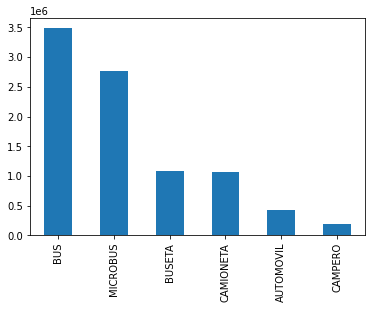

In [11]:
df['CLASE_VEHICULO'].value_counts().plot.bar()

Again, this doesn't show the dispatches real quantity for each type of vehicle, but the entries frequency in the dataset. A display of that real quantity, taking into account type of vehicle and dispatches (quantity).

Text(0.5, 1.0, 'Dispatches by Type of Vehicle')

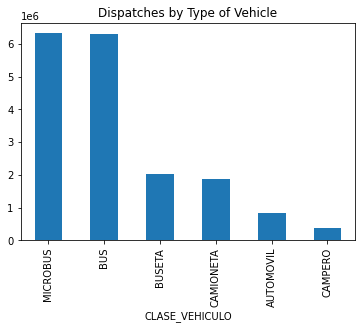

In [12]:
# Dispatches by Type of Vehicle
df.groupby('CLASE_VEHICULO').sum()['DESPACHOS'].sort_values(ascending=False).plot.bar()
plt.title('Dispatches by Type of Vehicle')

Text(0.5, 1.0, 'Passengers by Type of Vehicle')

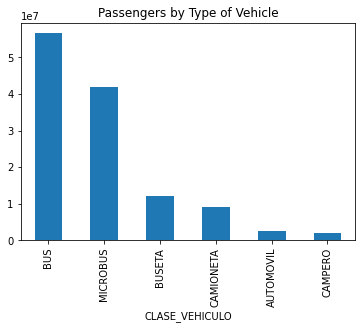

In [13]:
# Passengers by Type of Vehicle
df.groupby('CLASE_VEHICULO').sum()['PASAJEROS'].sort_values(ascending=False).plot.bar()
plt.title('Passengers by Type of Vehicle')

<AxesSubplot:xlabel='TIPO_DESPACHO'>

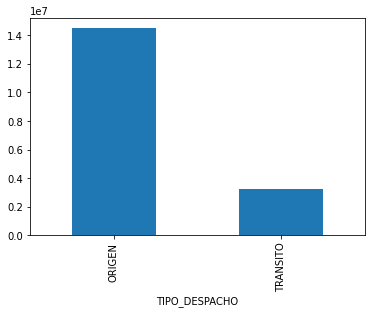

In [14]:
df.groupby('TIPO_DESPACHO').sum()['DESPACHOS'].sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='NIVEL_SERVICIO'>

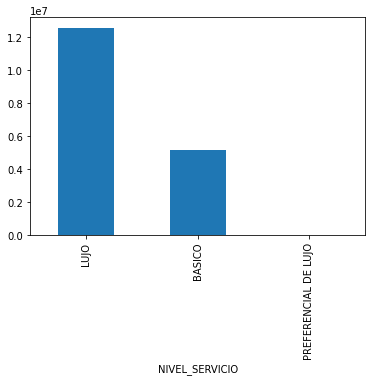

In [15]:
df.groupby('NIVEL_SERVICIO').sum()['DESPACHOS'].sort_values(ascending=False).plot.bar()

Now, we can see how the behavior of passengers during COVID-19 has been in terms of the time periods that can be appreciated.

Text(0.5, 1.0, 'Overall Passengers by Date')

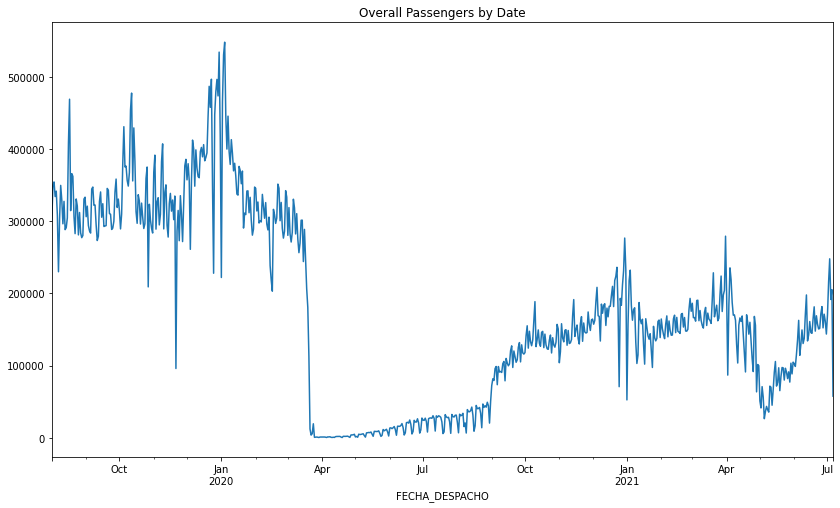

In [16]:
plt.figure(figsize = (14,8))
df[df['FECHA_DESPACHO']<'2052-12-28'].groupby('FECHA_DESPACHO').sum()['PASAJEROS'].plot()
plt.title('Overall Passengers by Date')

Dispatches have a behavior that follows the volume of passengers, therefore it is a consequence of the number of people using the transportation service.

Text(0.5, 1.0, 'Overall Dispatches by Date')

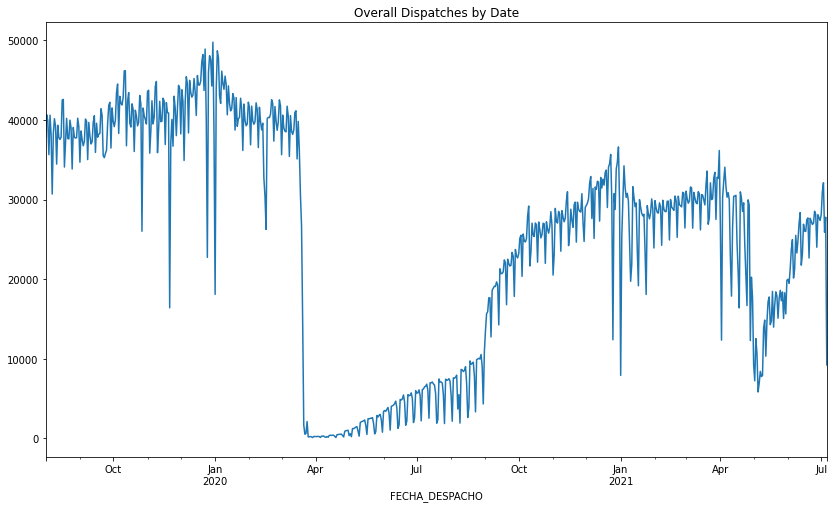

In [17]:
# Overall Dispatches by Date
plt.figure(figsize = (14,8))
df[df['FECHA_DESPACHO']<'2052-12-28'].groupby('FECHA_DESPACHO').sum()['DESPACHOS'].plot()
plt.title('Overall Dispatches by Date')

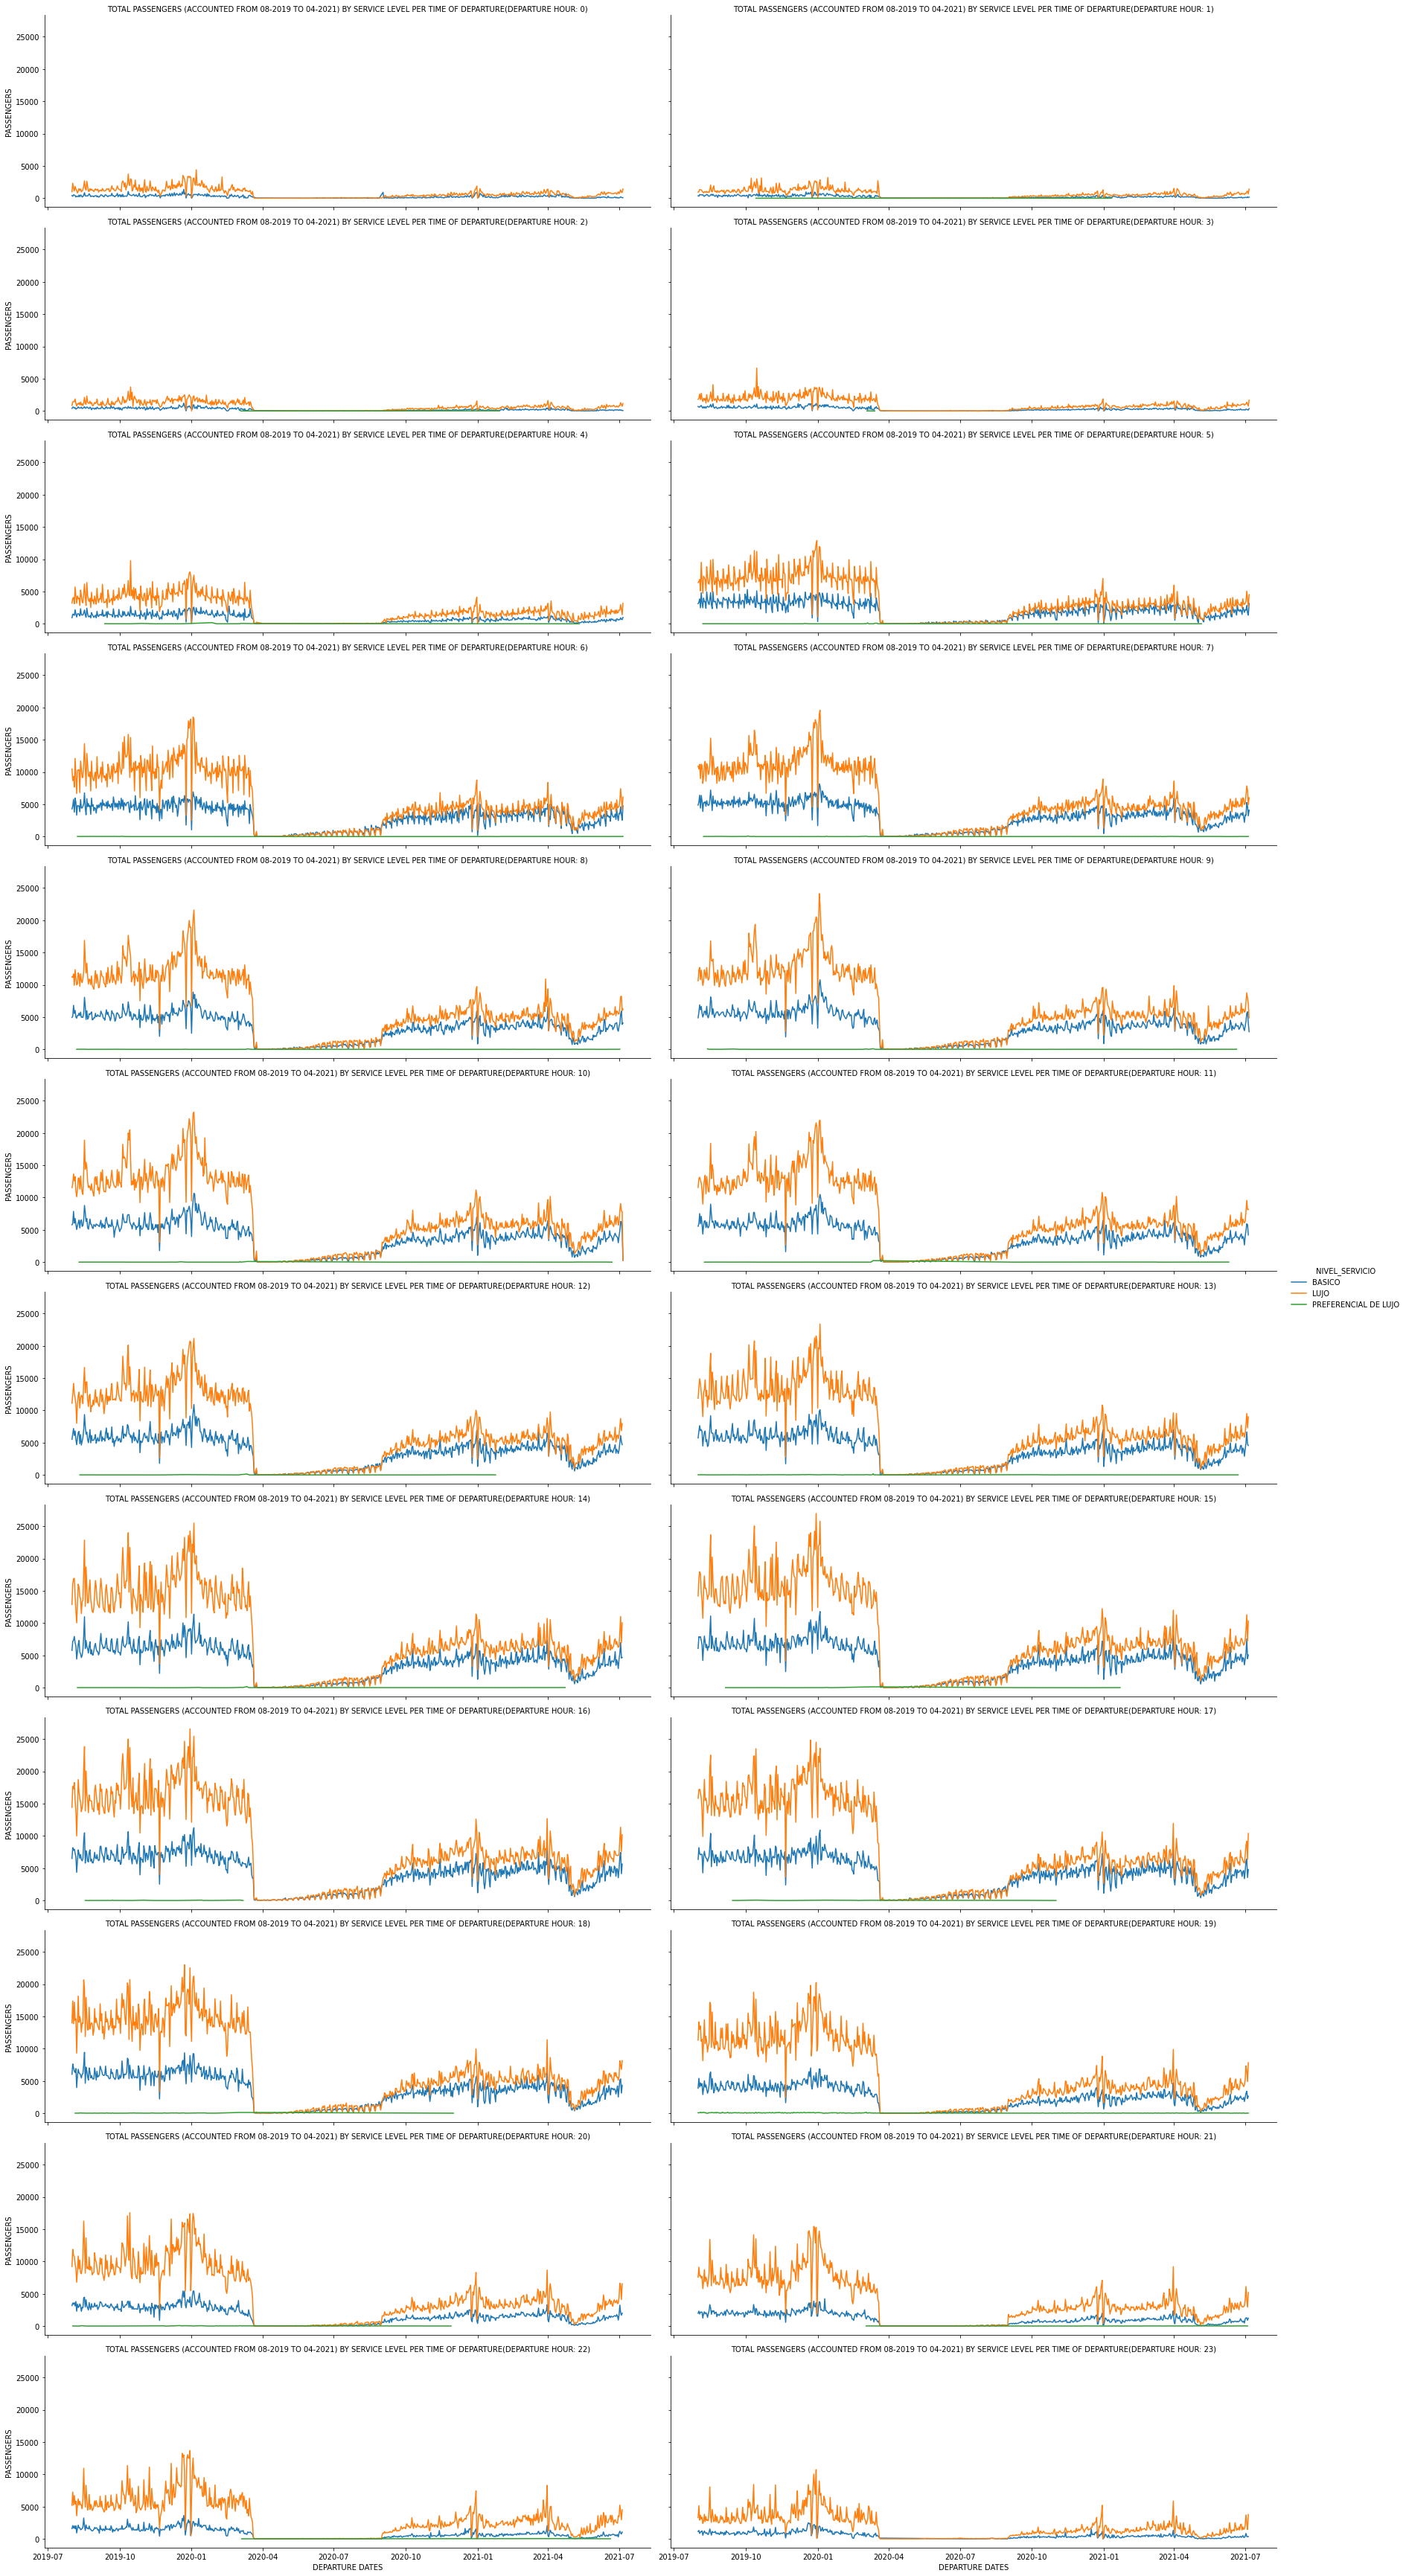

In [18]:
plot = (df[df['FECHA_DESPACHO']<'2052-12-28'].groupby(['HORA_DESPACHO', 'FECHA_DESPACHO', 'NIVEL_SERVICIO'])['PASAJEROS'].sum().reset_index())


g = sns.relplot(data = plot,
            x = 'FECHA_DESPACHO', 
            y = 'PASAJEROS',
            hue = 'NIVEL_SERVICIO', 
            col = 'HORA_DESPACHO',
            col_wrap = 2,
            height = 4, 
            aspect = 3, 
            kind = "line"
)

g.set_axis_labels("DEPARTURE DATES", "PASSENGERS").set_titles('TOTAL PASSENGERS (ACCOUNTED FROM 08-2019 TO 04-2021) BY SERVICE LEVEL PER TIME OF DEPARTURE(DEPARTURE HOUR: {col_name})')

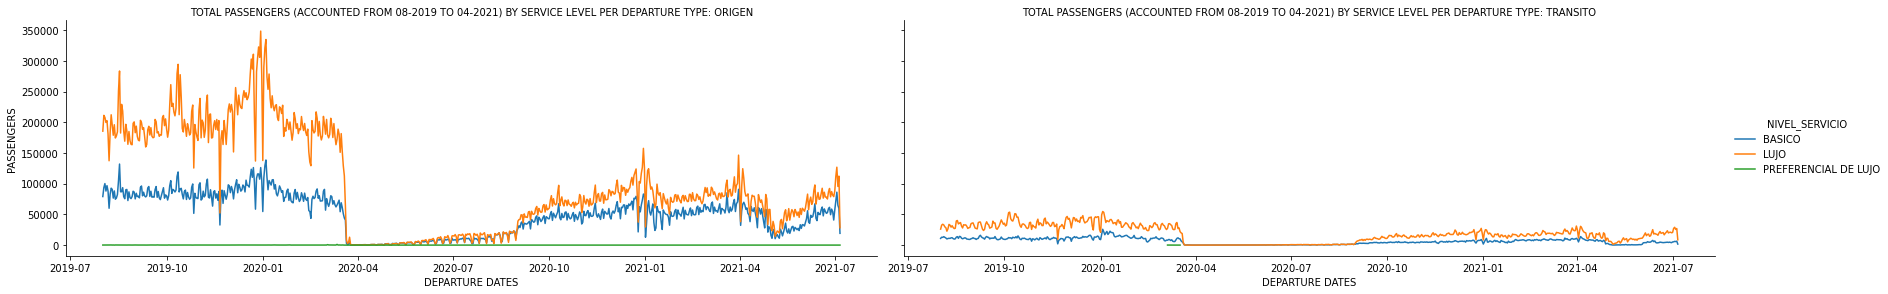

In [19]:
plot = (df[df['FECHA_DESPACHO']<'2052-12-28'].groupby(['TIPO_DESPACHO', 'FECHA_DESPACHO', 'NIVEL_SERVICIO'])['PASAJEROS'].sum().reset_index())


g = sns.relplot(data = plot,
            x = 'FECHA_DESPACHO', 
            y = 'PASAJEROS',
            hue = 'NIVEL_SERVICIO', 
            col = 'TIPO_DESPACHO',
            col_wrap = 2,
            height = 4, 
            aspect = 3, 
            kind = "line"
)

g.set_axis_labels("DEPARTURE DATES", "PASSENGERS").set_titles('TOTAL PASSENGERS (ACCOUNTED FROM 08-2019 TO 04-2021) BY SERVICE LEVEL PER DEPARTURE TYPE: {col_name}')

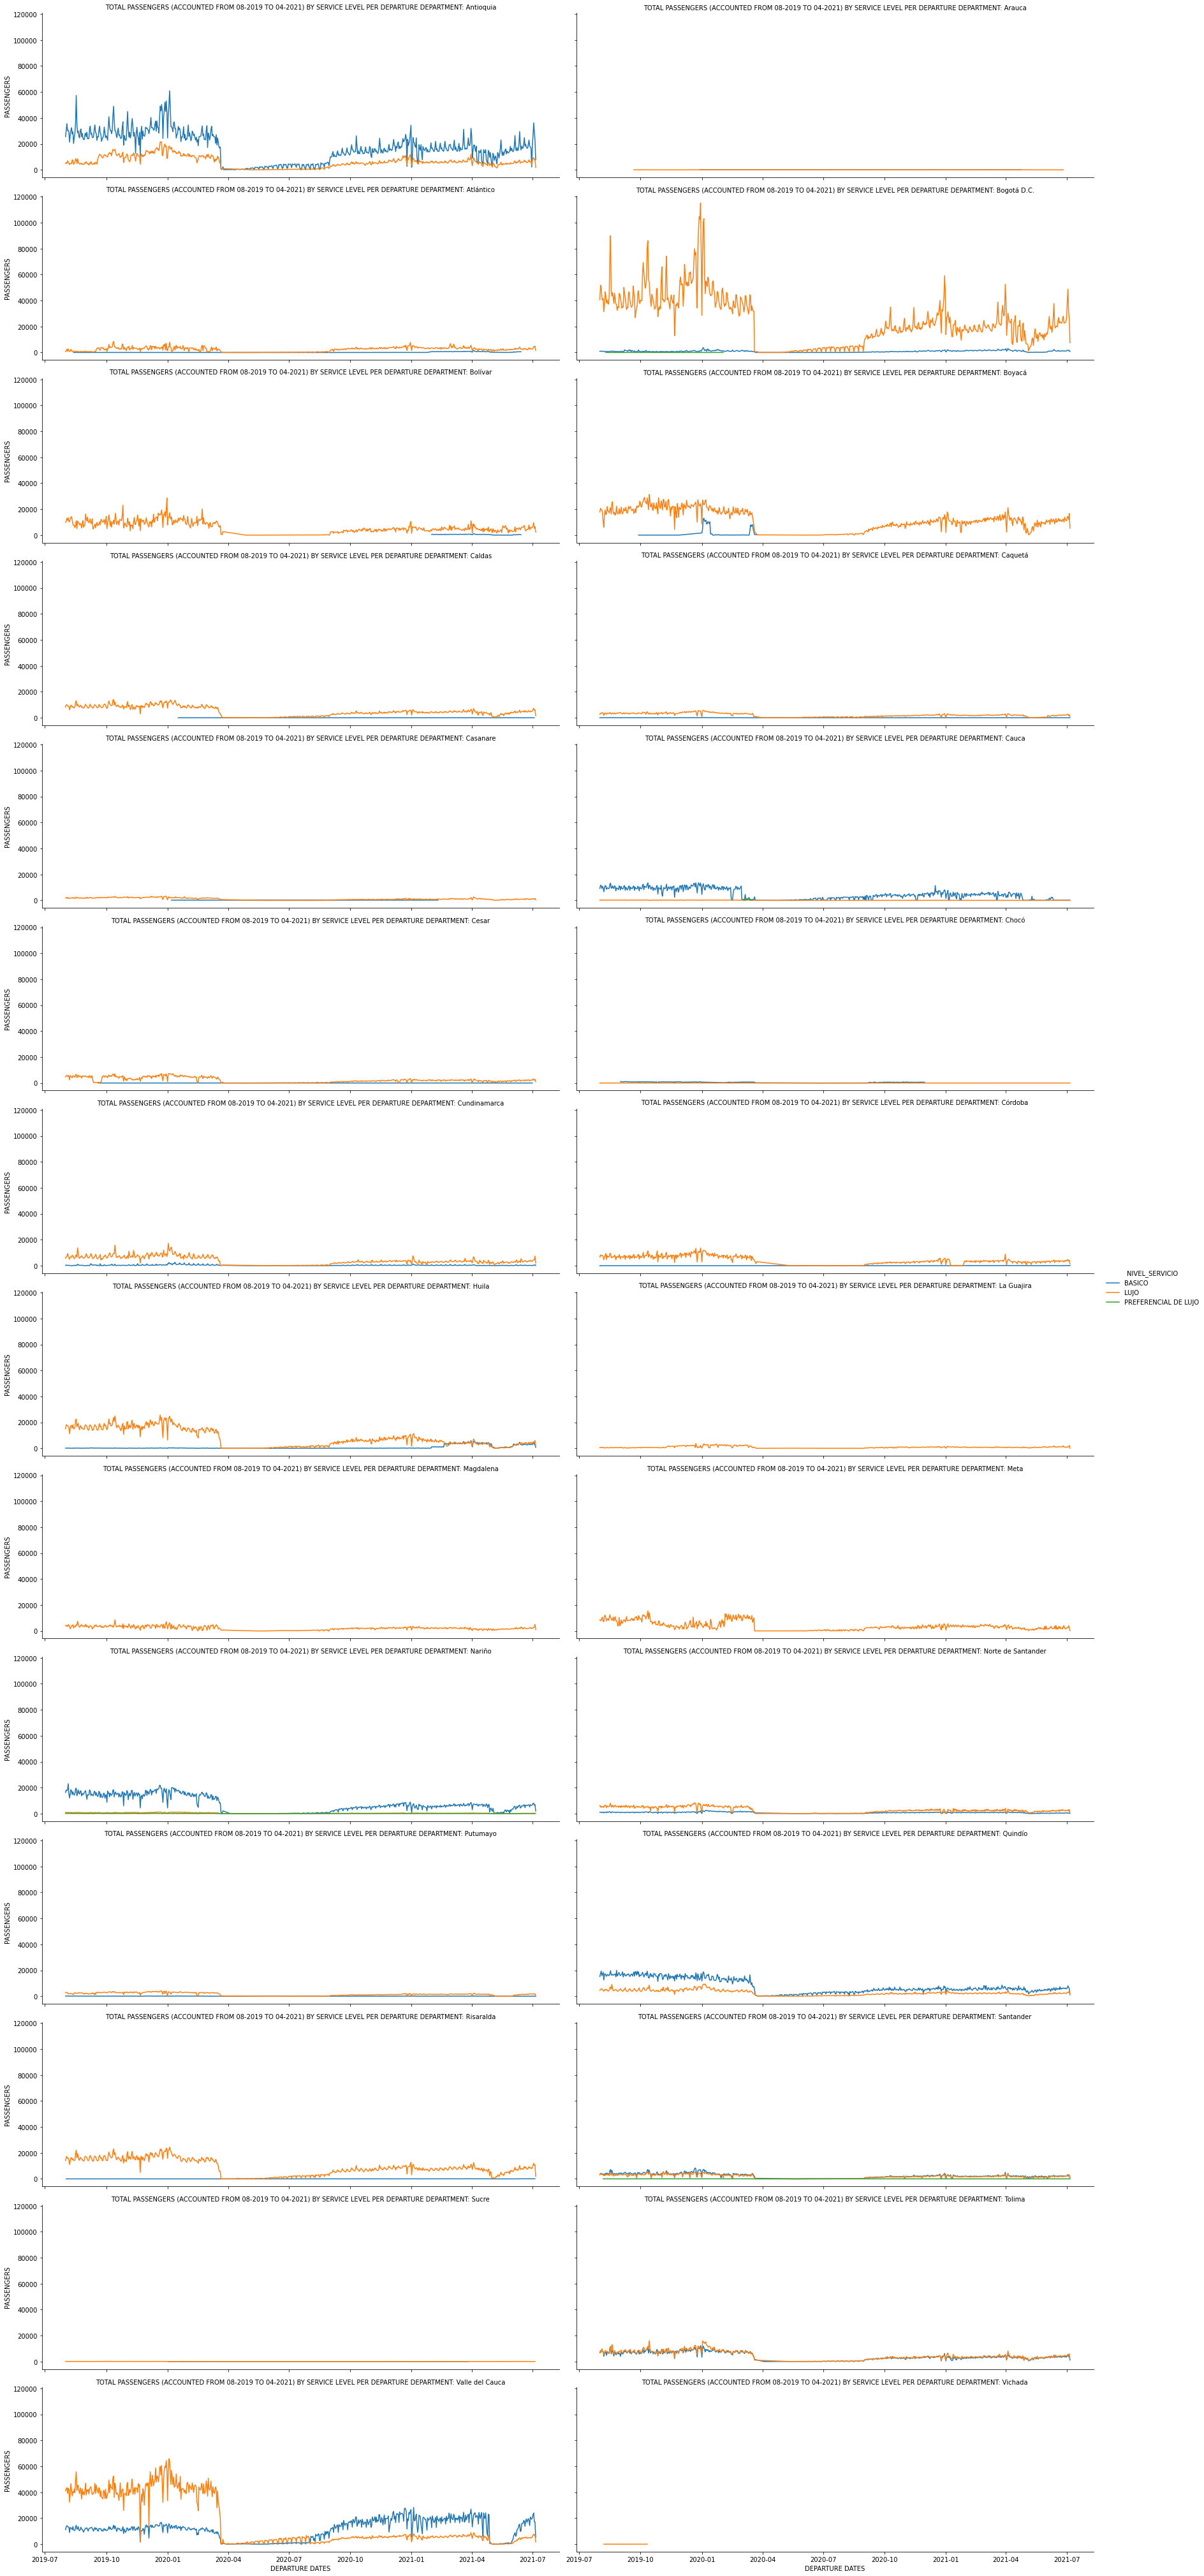

In [20]:
plot = (df[df['FECHA_DESPACHO']<'2052-12-28'].groupby(['DEPARTAMENTO_ORIGEN', 'FECHA_DESPACHO', 'NIVEL_SERVICIO'])['PASAJEROS'].sum().reset_index())


g = sns.relplot(data = plot,
            x = 'FECHA_DESPACHO', 
            y = 'PASAJEROS',
            hue = 'NIVEL_SERVICIO', 
            col = 'DEPARTAMENTO_ORIGEN',
            col_wrap = 2,
            height = 4, 
            aspect = 3, 
            kind = "line"
)

g.set_axis_labels("DEPARTURE DATES", "PASSENGERS").set_titles('TOTAL PASSENGERS (ACCOUNTED FROM 08-2019 TO 04-2021) BY SERVICE LEVEL PER DEPARTURE DEPARTMENT: {col_name}')

Text(0.5, 1.0, 'PASAJEROS SEGÚN NIVEL DE SERVICIO POR TERMINAL')

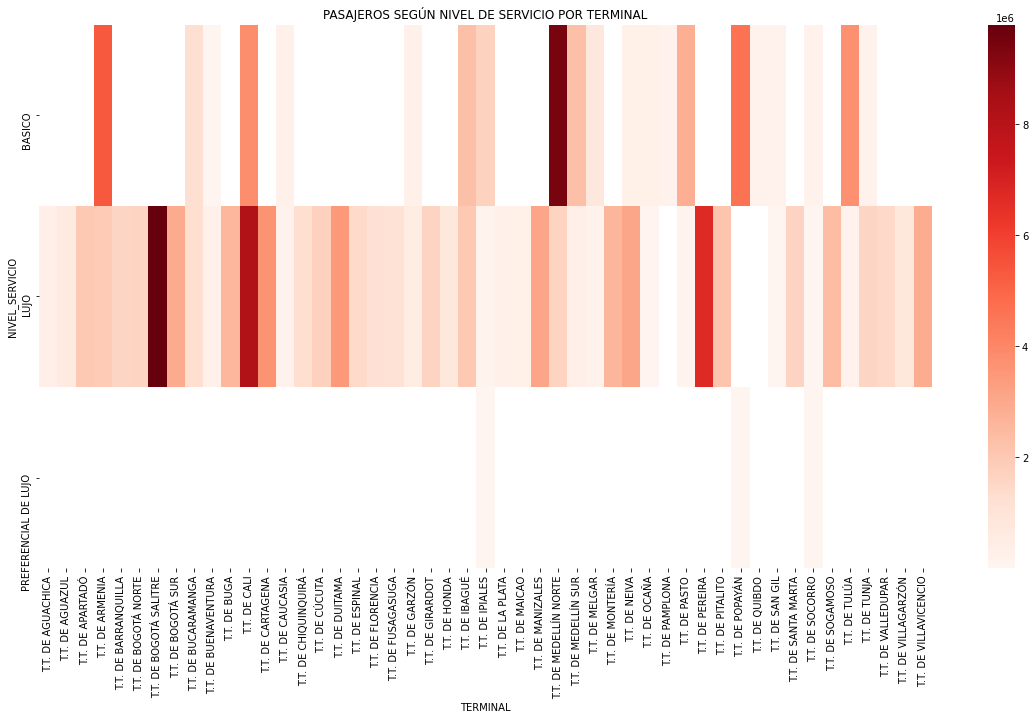

In [21]:
data = df.groupby(['TERMINAL','NIVEL_SERVICIO'])['PASAJEROS'].sum().reset_index()

table_pivot = pd.pivot_table(data, values = 'PASAJEROS', index = ['NIVEL_SERVICIO'], columns = ['TERMINAL'], )

f, ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(table_pivot, cmap = "Reds")
ax.set_title("PASAJEROS SEGÚN NIVEL DE SERVICIO POR TERMINAL") 

Text(0.5, 1.0, 'DESPACHOS SEGÚN NIVEL DE SERVICIO POR TERMINAL')

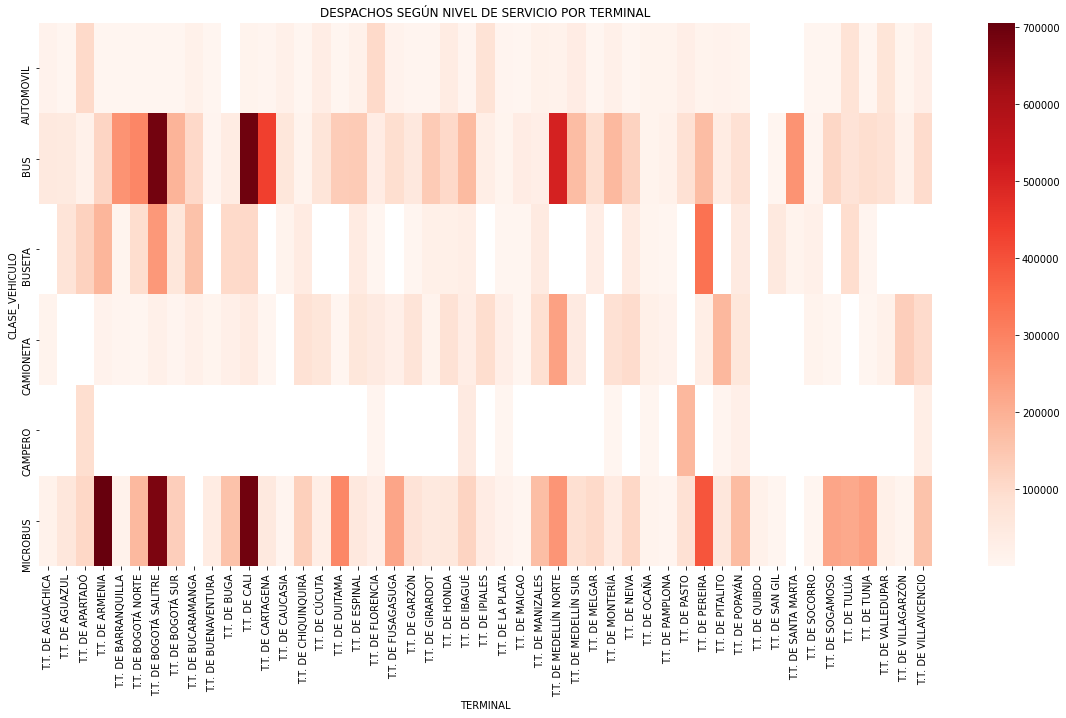

In [22]:
data_2 = df.groupby(['TERMINAL','CLASE_VEHICULO'])['DESPACHOS'].sum().reset_index()

table_pivot = pd.pivot_table(data_2, values = 'DESPACHOS', index = ['CLASE_VEHICULO'], columns = ['TERMINAL'], )

f, ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(table_pivot, cmap = "Reds")
ax.set_title("DESPACHOS SEGÚN NIVEL DE SERVICIO POR TERMINAL")

Text(0.5, 1.0, 'DESPACHOS SEGÚN NIVEL DE SERVICIO POR CLASE DE VEHICULO')

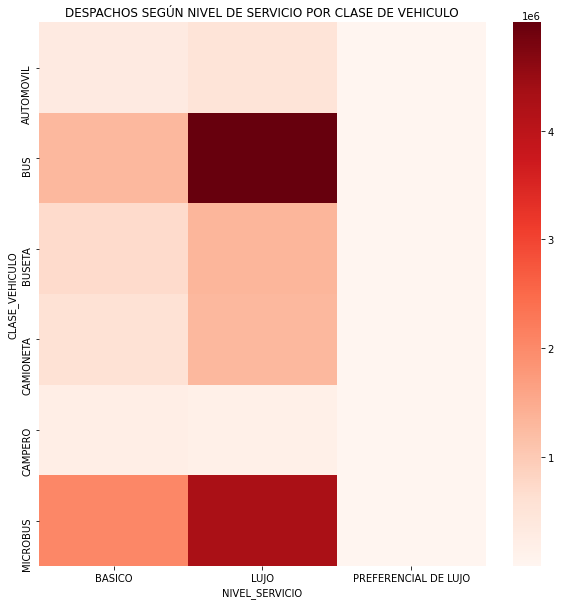

In [23]:
data_3 = df.groupby(['CLASE_VEHICULO','NIVEL_SERVICIO'])['DESPACHOS'].sum().reset_index()

table_pivot = pd.pivot_table(data_3, values = 'DESPACHOS', index = ['CLASE_VEHICULO'], columns = ['NIVEL_SERVICIO'], )

f, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(table_pivot, cmap = "Reds")
ax.set_title("DESPACHOS SEGÚN NIVEL DE SERVICIO POR CLASE DE VEHICULO")

<AxesSubplot:xlabel='DIA', ylabel='HORA_DESPACHO'>

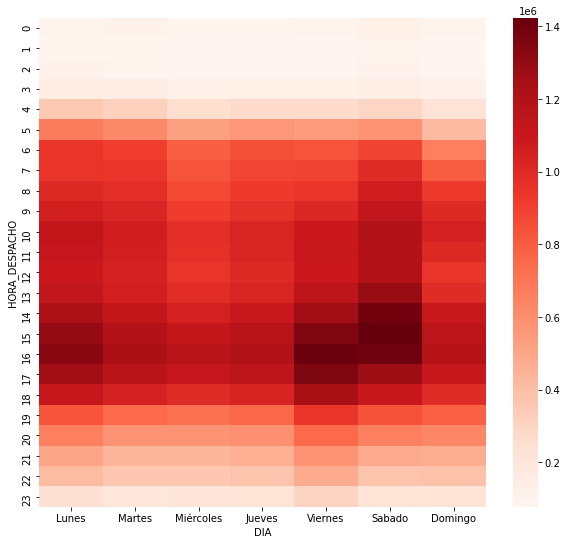

In [24]:
utilizacion_hora_dia=pd.crosstab(df.HORA_DESPACHO, df.DIA, aggfunc='sum',values = df.PASAJEROS)
plt.figure(figsize=(10,9))
sns.heatmap(utilizacion_hora_dia,cmap='Reds')

### EDA COVID

The EDA reflects an important change since the beginning of the pandemic due to covid 19, which generated a drop in travel and passengers, with a progressive recovery over time.

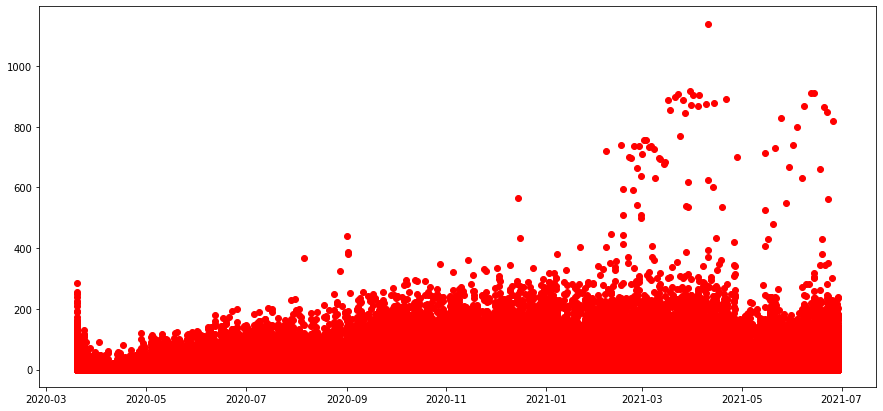

In [28]:
covidperiod = (df['FECHA_DESPACHO'] > '2020-03-19')&(df['FECHA_DESPACHO'] < '2021-06-30')

covid=df[covidperiod]

df_fech= covid['FECHA_DESPACHO']
df_pasa =covid['PASAJEROS']
plt.figure(figsize = (15,7))
plt.plot(df_fech, df_pasa, 'ro', linestyle="None")


<AxesSubplot:title={'center':'PASSENGERS PER DAY SINCE 2019-08-01 UNTIL 2020-03-19'}, xlabel='FECHA_DESPACHO', ylabel='PASSENGERS'>

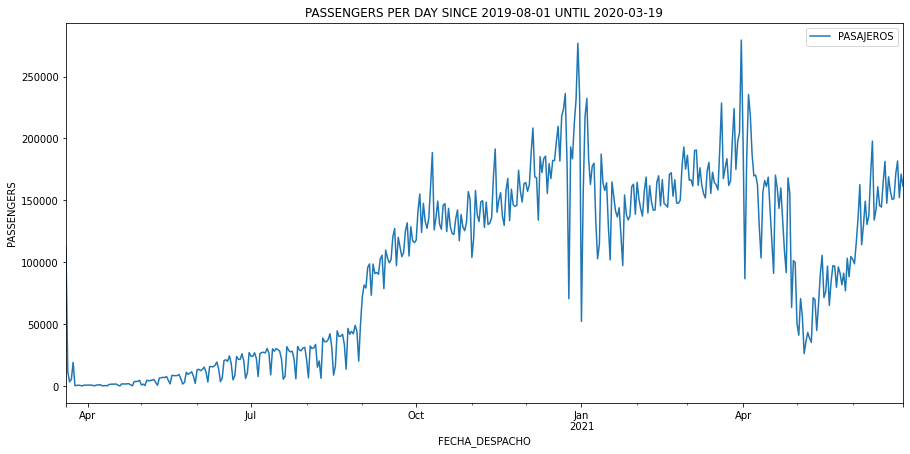

In [29]:
passengers_per_date = covid.groupby('FECHA_DESPACHO')['PASAJEROS'].sum()
passengers_per_date.plot(legend=True, title="PASSENGERS PER DAY SINCE 2019-08-01 UNTIL 2020-03-19",figsize=(15,7), 
                         ylabel='PASSENGERS' )

In the covid period, the number of passengers at a general level does not show great differences, although the lower levels are observed on Tuesdays and Wednesdays

<AxesSubplot:title={'center':'PASSENGERS PER DAY OF WEEK SINCE 2019-08-01 UNTIL 2020-03-19'}, xlabel='DAY_OF_WEEK', ylabel='PASSENGERS'>

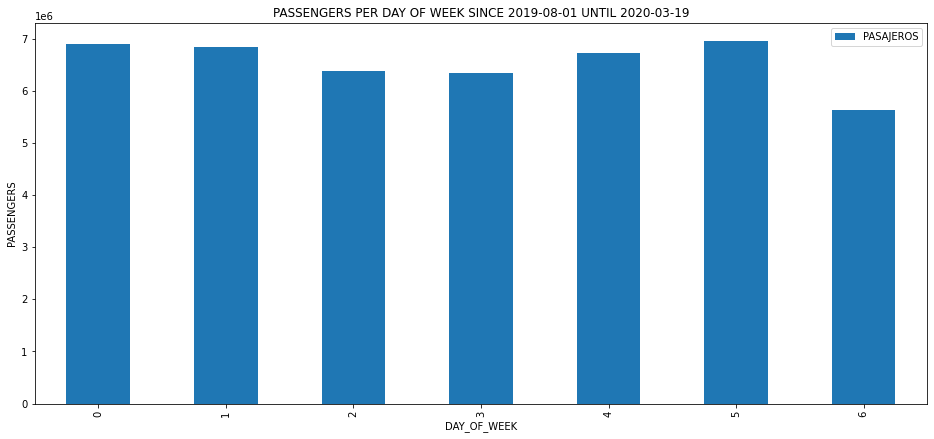

In [30]:
passengers_per_date=passengers_per_date.reset_index()
passengers_per_date["DAY_OF_WEEK"]=passengers_per_date["FECHA_DESPACHO"].dt.dayofweek

total_per_day=passengers_per_date.groupby('DAY_OF_WEEK')['PASAJEROS'].sum()

total_per_day.plot.bar(figsize=(16,7),
                      legend=True, title="PASSENGERS PER DAY OF WEEK SINCE 2019-08-01 UNTIL 2020-03-19", 
                         ylabel='PASSENGERS' )

In the covid period the same conclusion is obtained, each terminal has differences either in the destinations, types of service or vehicles that determine different levels of passengers

Text(0.5, 1.0, 'PASAJEROS SEGÚN NIVEL DE SERVICIO POR TERMINAL')

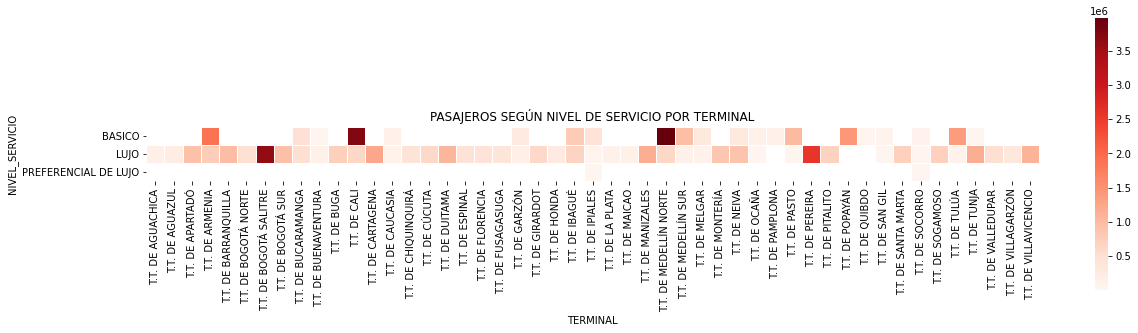

In [31]:
data = covid.groupby(['TERMINAL','NIVEL_SERVICIO'])['PASAJEROS'].sum().reset_index()

table_pivot = pd.pivot_table(data, values = 'PASAJEROS', index = ['NIVEL_SERVICIO'], columns = ['TERMINAL'], )

f, ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(table_pivot, cmap = "Reds", linewidths=.5, square=True, cbar_kws={"shrink": .50})
ax.set_title("PASAJEROS SEGÚN NIVEL DE SERVICIO POR TERMINAL") 